In [32]:
# ESTUDIANTE: KEYAR RAUL FERREL ALFARO

In [33]:
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv('taller2_MLE.csv')

In [35]:
print(df.dtypes)

edad                       int64
segmento                  object
saldo_total              float64
numero_productos           int64
visitas_app_mes            int64
usa_web                    int64
usa_tarjeta_credito        int64
reclamos_6m                int64
satisfaccion_encuesta    float64
tasa_credito_personal    float64
rango_ingresos            object
region                    object
cerrara_cuenta             int64
dtype: object


In [36]:
df.head()

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0


In [37]:
print(df.dtypes)

edad                       int64
segmento                  object
saldo_total              float64
numero_productos           int64
visitas_app_mes            int64
usa_web                    int64
usa_tarjeta_credito        int64
reclamos_6m                int64
satisfaccion_encuesta    float64
tasa_credito_personal    float64
rango_ingresos            object
region                    object
cerrara_cuenta             int64
dtype: object


In [44]:
print(df['rango_ingresos'].unique())
print(df['rango_ingresos'].isnull().sum())


['Medio' 'Muy Alto' 'Bajo' 'Alto']
0


In [46]:
df['rango_ingresos'] = df['rango_ingresos'].str.replace(' ', '_')


In [67]:
clf = setup(
    data=df,
    target='cerrara_cuenta',
    session_id=2025,
    categorical_features=['segmento', 'region', 'rango_ingresos'],
    remove_multicollinearity=True,
    multicollinearity_threshold=0.85,
    normalize=True,
    feature_selection=True,
    
    fix_imbalance=True,
    fix_imbalance_method='smote'
)


[LightGBM] [Info] Number of positive: 3009, number of negative: 3009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4807
[LightGBM] [Info] Number of data points in the train set: 6018, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,2025
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(7518, 3)"
5,Transformed train set shape,"(6018, 3)"
6,Transformed test set shape,"(1500, 3)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [68]:
#Comparar modelos automaticamente:
best_model_F1 = compare_models(sort='F1')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:57:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4271,0.5126,0.6314,0.1451,0.2359,0.0102,0.0181,0.2690
nb,Naive Bayes,0.4274,0.5159,0.6213,0.1436,0.2332,0.0070,0.0121,0.2730
lr,Logistic Regression,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,1.2430
ridge,Ridge Classifier,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.4290
lda,Linear Discriminant Analysis,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.3030
ada,Ada Boost Classifier,0.5623,0.5132,0.4360,0.1463,0.2187,0.0110,0.0135,0.3970
knn,K Neighbors Classifier,0.5529,0.5122,0.4460,0.1444,0.2181,0.0082,0.0113,0.3700
svm,SVM - Linear Kernel,0.4180,0.4852,0.5885,0.1360,0.2148,-0.0090,-0.0188,0.3130
gbc,Gradient Boosting Classifier,0.5886,0.4980,0.3871,0.1429,0.2085,0.0048,0.0061,0.5710
dt,Decision Tree Classifier,0.6006,0.4980,0.3563,0.1385,0.1993,-0.0027,-0.0027,0.3980


In [69]:
best_model_Recall = compare_models(sort='Recall')

In [70]:
best_model_AUC = compare_models(sort='AUC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:59:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.2770
ridge,Ridge Classifier,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.2280
lda,Linear Discriminant Analysis,0.5091,0.5176,0.5296,0.1487,0.2321,0.0169,0.0246,0.2320
nb,Naive Bayes,0.4274,0.5159,0.6213,0.1436,0.2332,0.0070,0.0121,0.3070
ada,Ada Boost Classifier,0.5623,0.5132,0.4360,0.1463,0.2187,0.0110,0.0135,0.3660
qda,Quadratic Discriminant Analysis,0.4271,0.5126,0.6314,0.1451,0.2359,0.0102,0.0181,0.2830
knn,K Neighbors Classifier,0.5529,0.5122,0.4460,0.1444,0.2181,0.0082,0.0113,0.2950
dummy,Dummy Classifier,0.8597,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2510
dt,Decision Tree Classifier,0.6006,0.4980,0.3563,0.1385,0.1993,-0.0027,-0.0027,0.2450
gbc,Gradient Boosting Classifier,0.5886,0.4980,0.3871,0.1429,0.2085,0.0048,0.0061,0.5230


In [84]:
lr = create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:48:02
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4600,0.4383,0.4082,0.1111,0.1747,-0.0582,-0.0857
1,0.5343,0.5599,0.5714,0.1647,0.2557,0.0490,0.0692
2,0.4914,0.5390,0.6122,0.1587,0.2521,0.0383,0.0585
3,0.5086,0.4939,0.4694,0.1361,0.2110,-0.0077,-0.0109
4,0.5229,0.5324,0.5510,0.1570,0.2443,0.0338,0.0481
5,0.5286,0.5196,0.4490,0.1375,0.2105,-0.0049,-0.0066
6,0.4971,0.5167,0.5306,0.1453,0.2281,0.0106,0.0155
7,0.5229,0.5679,0.6327,0.1722,0.2707,0.0649,0.0956
8,0.5086,0.5407,0.5714,0.1564,0.2456,0.0331,0.0484


In [89]:
tuned_lr = tune_model(lr, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4600,0.4383,0.4082,0.1111,0.1747,-0.0582,-0.0857
1,0.5343,0.5599,0.5714,0.1647,0.2557,0.0490,0.0692
2,0.4914,0.5390,0.6122,0.1587,0.2521,0.0383,0.0585
3,0.5086,0.4939,0.4694,0.1361,0.2110,-0.0077,-0.0109
4,0.5229,0.5324,0.5510,0.1570,0.2443,0.0338,0.0481
5,0.5286,0.5196,0.4490,0.1375,0.2105,-0.0049,-0.0066
6,0.4971,0.5167,0.5306,0.1453,0.2281,0.0106,0.0155
7,0.5229,0.5679,0.6327,0.1722,0.2707,0.0649,0.0956
8,0.5086,0.5407,0.5714,0.1564,0.2456,0.0331,0.0484


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


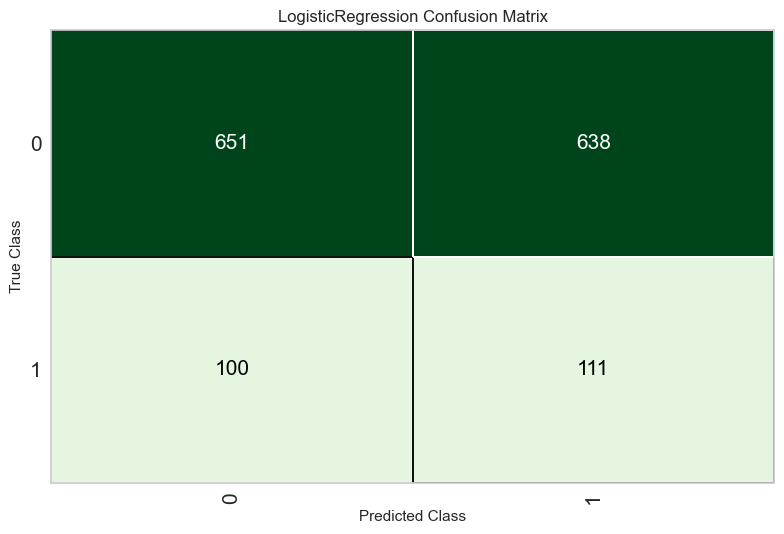

In [90]:
# 7. Interpretación y visualización
plot_model(tuned_lr, plot='confusion_matrix')

In [ ]:
# Evaluación interactiva
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [92]:
predicciones = predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5080,0.5320,0.5261,0.1482,0.2312,0.0151,0.0216


In [93]:
# Guardar modelo final para uso futuro
save_model(tuned_lr, 'modelo_taller2_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'saldo_total',
                                              'numero_productos',
                                              'visitas_app_mes', 'usa_web',
                                              'usa_tarjeta_credito',
                                              'reclamos_6m',
                                              'satisfaccion_encuesta',
                                              'tasa_credito_personal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feature...
                                                               

In [ ]:
#1.  ¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el dataset? 
df = pd.read_csv('taller2_MLE.csv')

print(df.head())


conteo_cierre = df['cerrara_cuenta'].value_counts()
porcentaje_cierre = df['cerrara_cuenta'].mean() * 100  

print("Conteo de clientes por cerrara_cuenta:")
print(conteo_cierre)
print(f"\nPorcentaje de clientes que cerraron su cuenta: {porcentaje_cierre:.2f}%")

total = len(df)
balance = conteo_cierre.min() / conteo_cierre.max()
print(f"\nBalance entre clases: {balance:.2f}")

# El porcentje de clientes que cerraron su cuenta es 14.04%
# El dataset está desbalanceado

   edad    segmento  saldo_total  numero_productos  visitas_app_mes  usa_web  \
0    48  Preferente     43791.80                 5               11        0   
1    36    Estándar     17940.87                 1                7        0   
2    48    Estándar      9308.09                 4                3        0   
3    30    Estándar       709.76                 5                5        1   
4    74  Preferente     20471.46                 1                4        0   

   usa_tarjeta_credito  reclamos_6m  satisfaccion_encuesta  \
0                    1            1                    4.2   
1                    1            0                    2.2   
2                    1            1                    1.0   
3                    1            0                    5.0   
4                    0            1                    3.1   

   tasa_credito_personal rango_ingresos  region  cerrara_cuenta  
0                  36.82          Medio  Sierra               0  
1             

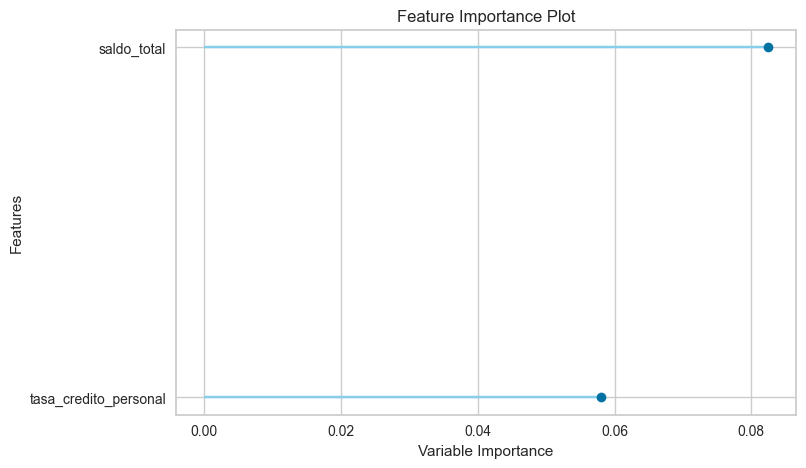

In [94]:
#2. ¿Qué variables tienen mayor correlación con cerrara_cuenta? 
plot_model(tuned_lr, plot='feature')

In [ ]:
#3. ¿Cuál es el mejor modelo en AUC? ¿Y en Recall? 

#El mejor modelo en Recall es Quadratic Discriminant Analysis
#Los mejores modelos en AUC son Logistic Regression, Ridge Clasiffier, Linear Discriminant Analysis

In [ ]:
#4. ¿Qué combinación de variables permite identificar clientes silenciosos que se van (sin reclamos)?
#Si se combinan cerrara_cuenta = 1 con reclamos6m = 0

In [ ]:
#5. ¿Qué pasa si el modelo predice mal un cliente que no se iba (falso positivo)? ¿Y uno que sí se iba (falso negativo)? 

In [ ]:
#6. ¿Qué umbral de score (default 0.5 vs optimizado por KS) deberías usar para reducir la pérdida financiera? 

In [ ]:
#7. ¿Cómo explicarías con SHAP que un cliente Premium con buen saldo igual fue predicho como fuga?

In [ ]:
#8. ¿Debería el modelo incluir la tasa de interés ofrecida como predictor, si luego esta puede cambiar según la política de retención? 

In [ ]:
#9. ¿Cómo usarías este modelo en un sistema de reglas mixtas (modelo + regla de negocio) para que los gestores humanos no pierdan confianza?